In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

np.random.seed(928)
plt.rcParams["font.family"] = ["SimHei"]  # 设置支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 导入相关的库

In [14]:
# 加载声纳数据集
def load_sonar_data():
    """
    加载声纳数据集
    返回: X (特征矩阵), y (标签向量)
    """
    # 读取数据文件
    data = pd.read_csv('connectionist+bench+sonar+mines+vs+rocks/sonar.all-data', header=None)
    
    # 分离特征和标签
    X = data.iloc[:, :-1].values  # 前60列为特征
    y = data.iloc[:, -1].values   # 最后一列为标签
    
    print(f"数据集形状: {data.shape}")
    print(f"特征矩阵形状: {X.shape}")
    print(f"标签向量形状: {y.shape}")
    
    return X, y, data



In [15]:
# 加载数据
X, y, raw_data = load_sonar_data()

数据集形状: (208, 61)
特征矩阵形状: (208, 60)
标签向量形状: (208,)


In [16]:
# 所以通过输出观察 
# Iris数据集是一个150 * 4 的数据集
# 有150条数据 每条数据4个特征
# 一共3个类别

In [17]:
# 同样先进行数据可视化
def visualize_samples(X, y, num_samples=10):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    fig.suptitle("Iris花卉样本", fontsize=16)

    indices = np.random.choice(len(X), num_samples, replace=False)

    for i, idx in enumerate(indices):
        row = i // 5
        col = i % 5

        image = X[idx].reshape(2, 2)

        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(f"标签：{y[idx]}")
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

In [18]:
# visualize_samples(X, y)

In [19]:
# 通过与USPS数据集相同的可视化操作
# 发现并没有是理想的情况
# 一方面是USPS数据集的每个样本是256维度的，而Iris数据集则是4维度
# 另一方面，通过查询相关资料，得知每个样本有 4 个特征用于描述花的形态
# 所以做以上的可视化实际上是没有意义的

In [20]:
# 下面开始进行样本的划分
# 1.固定数目
def fixed_number_split(X, y, train_size=110, test_size=40, random_seed=929):
    total_needed = train_size + test_size
    if total_needed > len(X):
        print(f"当前数据集样本数为{len(X)}，无法满足训练集和测试集的需求")
        train_size = int(len(X) * 0.8)
        test_size = len(X) - train_size
    np.random.seed(random_seed)

    indices = np.random.permutation(len(X))
    # 生成一个包含从0到len(X) - 1的整数数组，并将这些整数随机排列
    # 达到随机取样的目的

    train_indices = indices[:train_size]
    test_indices = indices[train_size:train_size + test_size]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    print(f"训练集大小：{X_train.shape}")
    print(f"测试集大小：{X_test.shape}")

    train_unique, train_counts = np.unique(y_train, return_counts=True)
    test_unique, test_counts = np.unique(y_test, return_counts=True)
    # 用来找出数组中所有的唯一元素

    print("训练集类别分布：",dict(zip(train_unique, train_counts)))
    print("测试集类别分布：",dict(zip(test_unique, test_counts)))
    
    return X_train, X_test, y_train, y_test

# 2.固定比例
def fixed_ratio_split(X, y, test_ratio=0.2, random_seed=929):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=random_seed, stratify=y
    ) # stratify=y，表示对标签y进行分层抽样，即按照类别标签的比例进行拆分数据集
    print(f"数据集总大小: {len(X)}")
    print(f"训练集大小: {X_train.shape} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"测试集大小: {X_test.shape} ({len(X_test)/len(X)*100:.1f}%)")
    
    return X_train, X_test, y_train, y_test

# 3.K折交叉验证
def k_fold_split(X, y, k=5, random_seed=929):
    kfold = KFold(n_splits=k, shuffle=True, random_state=random_seed)

    fold_info = []
    for fold, (train_idx, test_idx) in enumerate(kfold.split(X)):
        X_train_fold = X[train_idx]
        X_test_fold = X[test_idx]
        y_train_fold = y[train_idx]
        y_test_fold = y[test_idx]

        print(f"第 {fold + 1} 折：")
        print(f"训练集大小：{len(train_idx)}({len(train_idx)/len(X)*100:.1f})%")
        print(f"验证集大小：{len(test_idx)}({len(test_idx)/len(X)*100:.1f})%")

        fold_info.append({
            'fold': fold + 1,
            'train_idx':train_idx,
            'test_idx': test_idx,
            'X_train': X_train_fold,
            'X_test': X_test_fold,
            'y_train': y_train_fold,
            'y_test': y_test_fold
        })
    
    print(f"一共生成了{k}折数据")
    return fold_info


In [21]:
# 进行数据划分
# 1.固定数目划分
X_train_fixed, X_test_fixed, y_train_fixed, y_test_fixed = fixed_number_split(
    X, y, train_size=110,test_size=40, random_seed=929
)
# 2.固定比例划分
X_train_ratio, X_test_ratio, y_train_ratio, y_test_ratio = fixed_ratio_split(
    X, y, test_ratio=0.2, random_seed=929
)
# 3.k折交叉划分
kfold_data = k_fold_split(X, y, k=5)


训练集大小：(110, 60)
测试集大小：(40, 60)
训练集类别分布： {'M': np.int64(62), 'R': np.int64(48)}
测试集类别分布： {'M': np.int64(21), 'R': np.int64(19)}
数据集总大小: 208
训练集大小: (166, 60) (79.8%)
测试集大小: (42, 60) (20.2%)
第 1 折：
训练集大小：166(79.8)%
验证集大小：42(20.2)%
第 2 折：
训练集大小：166(79.8)%
验证集大小：42(20.2)%
第 3 折：
训练集大小：166(79.8)%
验证集大小：42(20.2)%
第 4 折：
训练集大小：167(80.3)%
验证集大小：41(19.7)%
第 5 折：
训练集大小：167(80.3)%
验证集大小：41(19.7)%
一共生成了5折数据


In [22]:
# 通过以上代码得到对应的三种数据划分
# 现在进行对应的KNN分类器的设计

In [23]:
# 首先实现对应的距离函数
def euclidean_distance(x1, x2): # 计算对应的欧氏距离
    return np.sqrt(np.sum((x1 - x2)**2))

def manhattan_distance(x1, x2): # 计算对应的曼哈顿距离
    return np.sum(np.abs(x1 - x2))

def cosine_distance(x1, x2):
    dot_product = np.dot(x1, x2)
    norm_x1 = np.linalg.norm(x1)
    norm_x2 = np.linalg.norm(x2)
    # 计算对应的欧几里得范数
    if norm_x1 == 0 or norm_x2 == 0:
        return 1.0
    
    cosine_sim = dot_product / (norm_x1 * norm_x2)
    # 计算两个向量之间的相似度
    # 然后 1 - cosine_sim 即为对应的余弦距离
    return 1 - cosine_sim

In [24]:
# 实现以上的距离的计算函数后
# 下面开始进行KNN分类器的实现
class KNNClassifier:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

        if distance_metric == 'euclidean':
            self.distance_func = euclidean_distance
        elif distance_metric == 'manhattan':
            self.distance_func = manhattan_distance
        elif distance_metric == 'cosine':
            self.distance_func = cosine_distance
        else:
            raise ValueError("不支持的距离计算方法")

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

        print(f"KNN分类器训练完成")
        print(f"训练样本数：{len(X_train)}")
        print(f"特征维度：{X_train.shape}")
        print(f"使用距离度量：{self.distance_metric}")
        print(f"K值：{self.k}")
    # 实现对一个样本的预测
    def predict_single(self, x):
        distances = []
        for i, x_train in enumerate(self.X_train):
            dist = self.distance_func(x, x_train)
            distances.append((dist, self.y_train[i]))
        
        distances.sort(key=lambda x:x[0])
        k_nearest = distances[:self.k]

        k_labels = [labels for _, labels in k_nearest]
        unique_labels, counts = np.unique(k_labels, return_counts=True)
        max_count_idx = np.argmax(counts)

        return unique_labels[max_count_idx]

    def predict(self, X_test):
        predictions = []
        total_samples = len(X_test)

        for i, x in  enumerate(X_test):
            pred = self.predict_single(x)
            predictions.append(pred)

            if (i + 1) % 100 == 0 or (i+1) == total_samples:
                print(f"已完成：{i+1}/{total_samples}({(i+1)/total_samples*100:.1f}%)")

        
        return np.array(predictions)

In [25]:
knn_fixed = KNNClassifier(k=5, distance_metric='euclidean')

knn_fixed.fit(X_train_fixed, y_train_fixed)

y_pred_fixed = knn_fixed.predict(X_test_fixed)

accuracy_fixed = np.mean(y_pred_fixed == y_test_fixed)

print(f"固定数目划分方法的分类准确率：{accuracy_fixed:.4f}({accuracy_fixed*100:.2f})")
print(f"正确分类样本数：{np.sum(y_pred_fixed == y_test_fixed)}")
print(f"错误分类样本数：{np.sum(y_pred_fixed !=y_test_fixed)}")
print(f"总测试样本数：{len(y_test_fixed)}")

KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：euclidean
K值：5
已完成：40/40(100.0%)
固定数目划分方法的分类准确率：0.7250(72.50)
正确分类样本数：29
错误分类样本数：11
总测试样本数：40


KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：euclidean
K值：1
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：euclidean
K值：3


已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：euclidean
K值：5
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：euclidean
K值：7
已完成：40/40(100.0%)


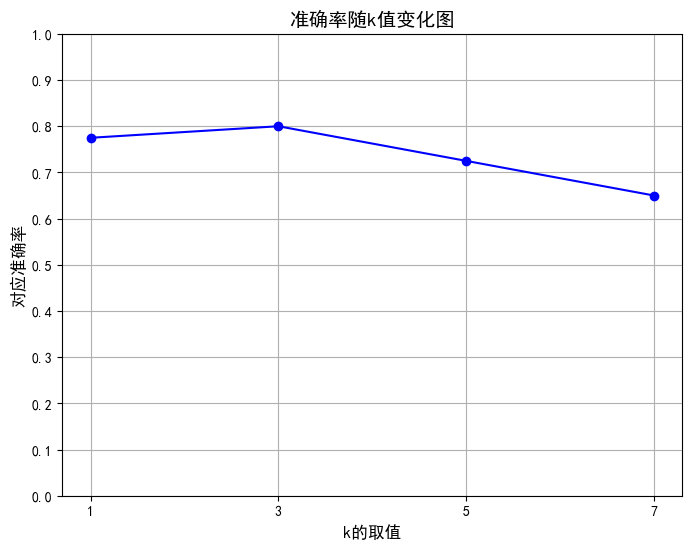

In [26]:
# 现在开始绘制对应的图表
k_values = [1, 3, 5, 7]
accuracies = []

for k in k_values:
    knn = KNNClassifier(k=k,distance_metric='euclidean')
    knn.fit(X_train_fixed, y_train_fixed)
    y_pred = knn.predict(X_test_fixed)

    accuracy = np.mean(y_pred == y_test_fixed)
    accuracies.append(accuracy)

plt.figure(figsize=(8,6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')

plt.title('准确率随k值变化图',fontsize=14)
plt.xlabel('k的取值',fontsize=12)
plt.ylabel('对应准确率',fontsize=12)

plt.grid(True)
plt.xticks(k_values)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()

In [27]:
def plot_knn_accuracy(X_train, y_train, X_test, y_test, k_values, distance_metrics=['euclidean', 'manhattan', 'cosine'], class_names=None):
    
    # 存储各指标数据
    oa_data = {}
    aa_data = {}
    kappa_data = {}
    
    # 创建子图
    plt.figure(figsize=(15, 5))
    
    # 对每种距离度量计算指标
    for distance_metric in distance_metrics:
        oa_values = []
        aa_values = []
        kappa_values = []
        
        for k in k_values:
            # 初始化 KNN 分类器
            knn = KNNClassifier(k=k, distance_metric=distance_metric)
            
            # 训练模型
            knn.fit(X_train, y_train)
            
            # 预测
            y_pred = knn.predict(X_test)
            
            # 计算混淆矩阵
            cm = confusion_matrix(y_test, y_pred)
            
            # 计算OA (Overall Accuracy)
            oa = np.sum(y_test == y_pred) / len(y_test)
            oa_values.append(oa)
            
            # 计算AA (Average Accuracy)
            n_classes = len(np.unique(y_test))
            class_accuracies = []
            for i in range(n_classes):
                class_correct = cm[i, i]
                class_total = np.sum(cm[i, :])
                if class_total > 0:
                    class_acc = class_correct / class_total
                else:
                    class_acc = 0
                class_accuracies.append(class_acc)
            aa = np.mean(class_accuracies)
            aa_values.append(aa)
            
            # 计算Kappa系数
            total_samples = np.sum(cm)
            po = oa
            pe = 0
            for i in range(n_classes):
                row_sum = np.sum(cm[i, :])
                col_sum = np.sum(cm[:, i])
                pe += (row_sum * col_sum) / (total_samples * total_samples)
            
            if pe == 1:
                kappa = 0
            else:
                kappa = (po - pe) / (1 - pe)
            kappa_values.append(kappa)
        
        # 存储数据
        oa_data[distance_metric] = oa_values
        aa_data[distance_metric] = aa_values
        kappa_data[distance_metric] = kappa_values
    
    # 绘制OA图
    plt.subplot(1, 3, 1)
    for distance_metric in distance_metrics:
        plt.plot(k_values, oa_data[distance_metric], marker='o', label=f'{distance_metric} distance')
    plt.title('OA随k值变化', fontsize=14)
    plt.xlabel('k的取值', fontsize=12)
    plt.ylabel('OA', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(k_values)
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # 绘制AA图
    plt.subplot(1, 3, 2)
    for distance_metric in distance_metrics:
        plt.plot(k_values, aa_data[distance_metric], marker='s', label=f'{distance_metric} distance')
    plt.title('AA随k值变化', fontsize=14)
    plt.xlabel('k的取值', fontsize=12)
    plt.ylabel('AA', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(k_values)
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # 绘制Kappa图
    plt.subplot(1, 3, 3)
    for distance_metric in distance_metrics:
        plt.plot(k_values, kappa_data[distance_metric], marker='^', label=f'{distance_metric} distance')
    plt.title('Kappa系数随k值变化', fontsize=14)
    plt.xlabel('k的取值', fontsize=12)
    plt.ylabel('Kappa', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(k_values)
    
    plt.tight_layout()
    plt.show()
    
    # 找出最佳OA对应的参数并显示其混淆矩阵
    best_oa = 0
    best_params = None
    best_cm = None
    
    for distance_metric in distance_metrics:
        for i, k in enumerate(k_values):
            if oa_data[distance_metric][i] > best_oa:
                best_oa = oa_data[distance_metric][i]
                best_params = (distance_metric, k)
                
                # 重新计算最佳参数的混淆矩阵
                knn = KNNClassifier(k=k, distance_metric=distance_metric)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                best_cm = confusion_matrix(y_test, y_pred)
    
    # 绘制最佳参数的混淆矩阵
    plt.figure(figsize=(8, 6))
    if class_names is None:
        class_names = [f'Class {i}' for i in range(len(best_cm))]
    
    sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': '样本数量'})
    plt.title(f'最佳参数混淆矩阵 ({best_params[0]}, k={best_params[1]}, OA={best_oa:.4f})', fontsize=14)
    plt.xlabel('预测类别', fontsize=12)
    plt.ylabel('真实类别', fontsize=12)
    plt.show()
    
    # 打印最佳参数信息
    print(f"最佳参数: {best_params[0]} 距离, k={best_params[1]}")
    print(f"最佳OA: {best_oa:.4f}")

KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：euclidean
K值：1
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：euclidean
K值：3
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：euclidean
K值：5
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：euclidean
K值：7
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：manhattan
K值：1
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：manhattan
K值：3
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：manhattan
K值：5
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：manhattan
K值：7
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：cosine
K值：1
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：cosine
K值：3
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：cosine
K值：5
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：cosine
K值：7
已完成：40/40(100.0%)


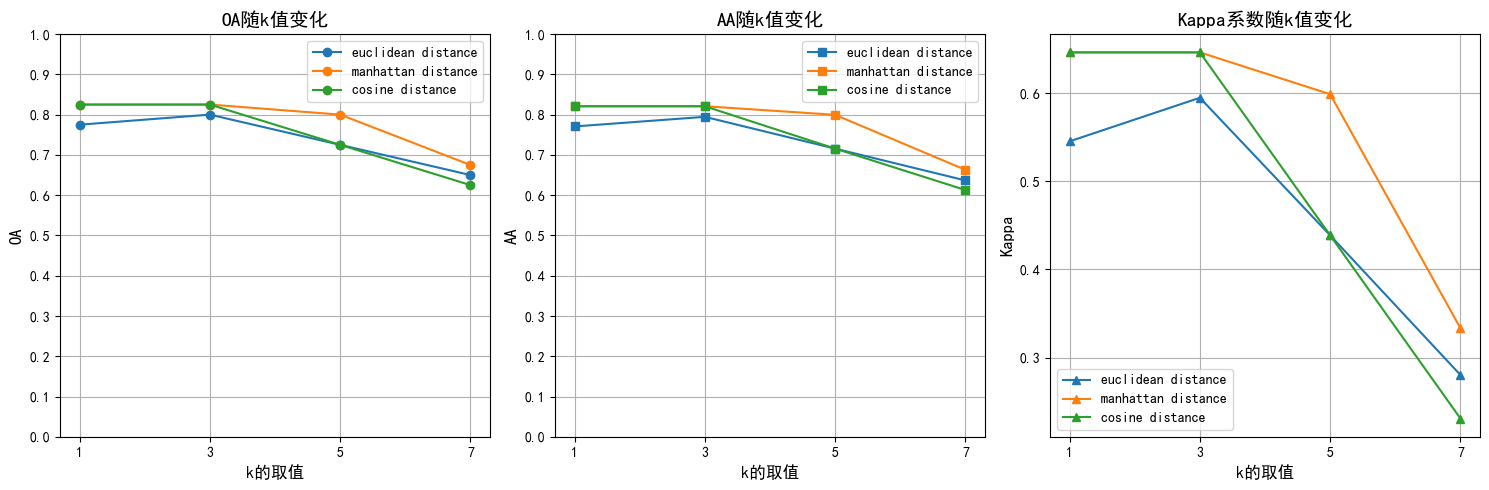

KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：euclidean
K值：1
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：euclidean
K值：3
已完成：40/40(100.0%)
KNN分类器训练完成
训练样本数：110
特征维度：(110, 60)
使用距离度量：manhattan
K值：1
已完成：40/40(100.0%)


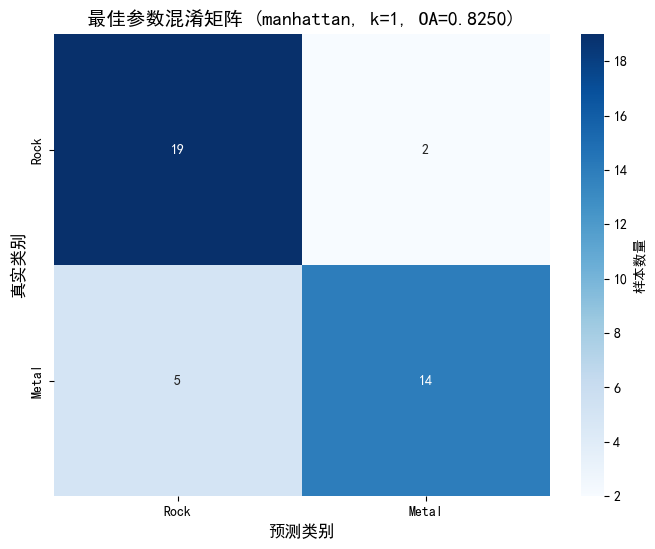

最佳参数: manhattan 距离, k=1
最佳OA: 0.8250


In [28]:
# 1.对于固定数目分类
plot_knn_accuracy(X_train_fixed, y_train_fixed, X_test_fixed, y_test_fixed, k_values=[1,3,5,7], distance_metrics=['euclidean', 'manhattan', 'cosine'],class_names=['Rock','Metal'])

KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：7
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：7
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：7
已完成：42/42(100.0%)


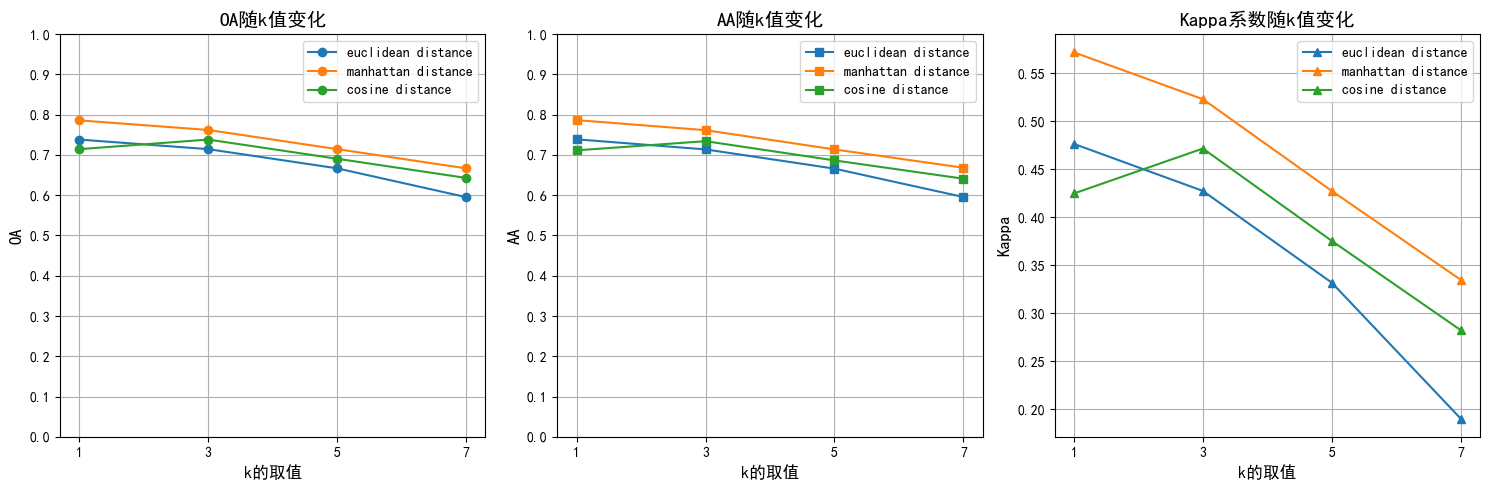

KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：1
已完成：42/42(100.0%)


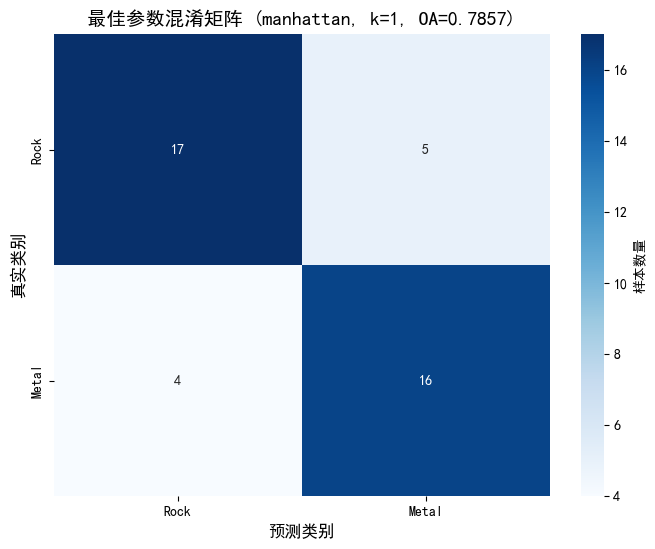

最佳参数: manhattan 距离, k=1
最佳OA: 0.7857


In [29]:
# 2.对于固定比例分类
plot_knn_accuracy(X_train_ratio, y_train_ratio, X_test_ratio, y_test_ratio, k_values=[1,3,5,7], distance_metrics=['euclidean', 'manhattan', 'cosine'],class_names=['Rock','Metal'])

开始执行5折交叉验证，每折都会绘制相应图像

正在处理第1折...
第1折训练集大小：166，测试集大小：42
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：7
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：7
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：7
已完成：42/42(100.0%)


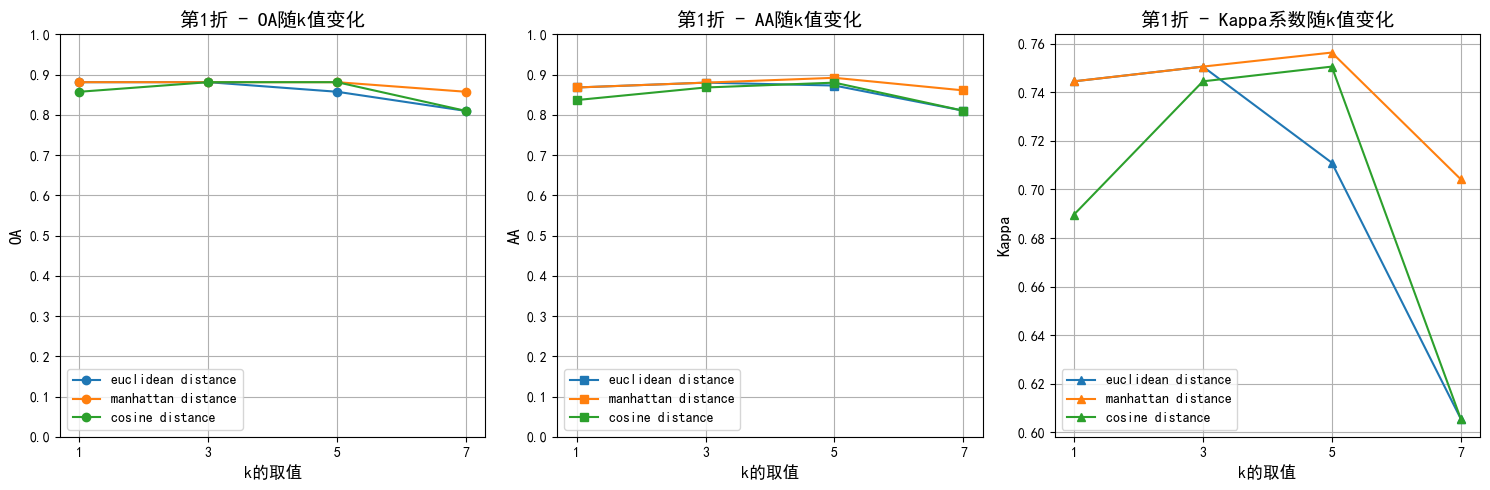

KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：1
已完成：42/42(100.0%)


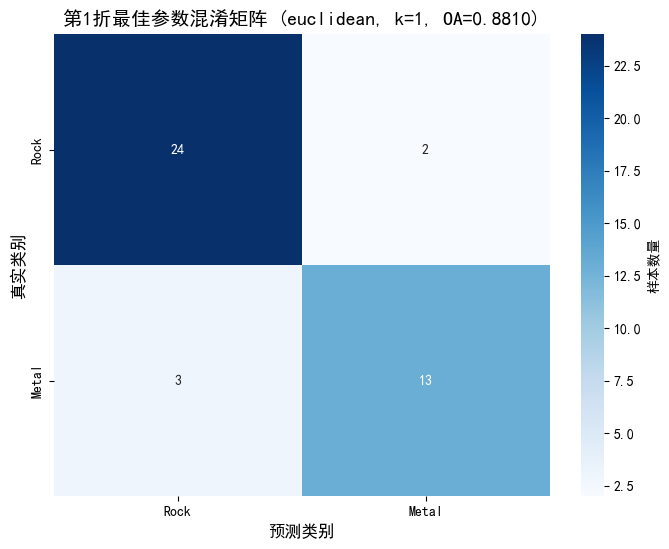

第1折最佳参数: euclidean 距离, k=1, OA=0.8810
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：7
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：7
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：7
已完成：42/42(100.0%)

正在处理第2折...
第2折训练集大小：166，测试集大小：42
KNN分类器训练完成
训练样本数：166
特征维度：(1

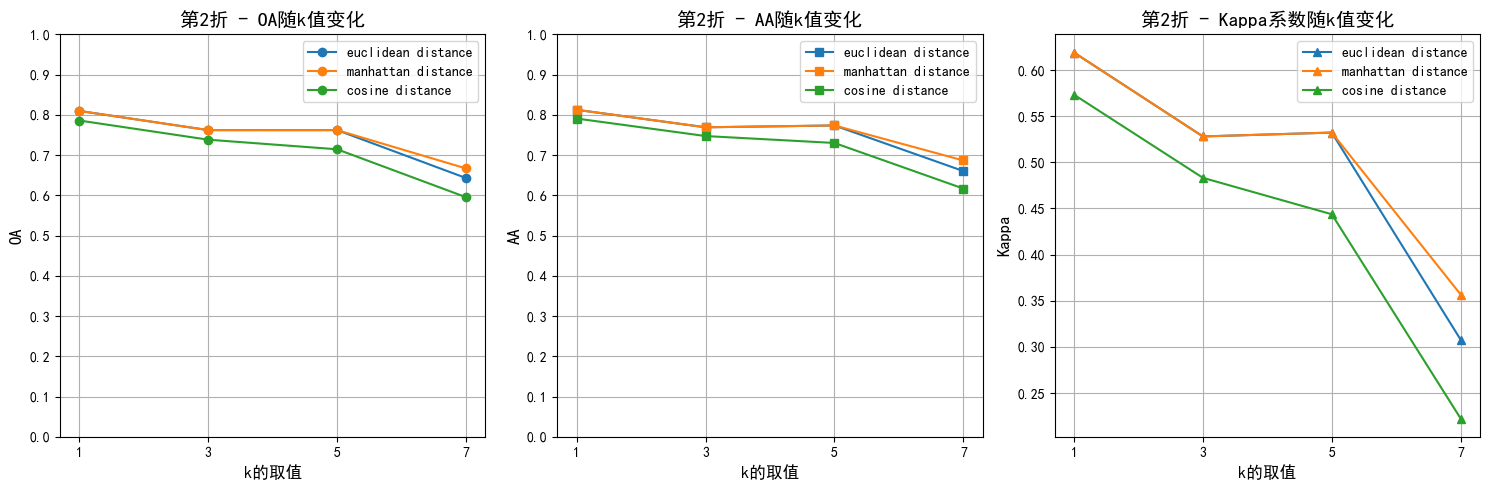

KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：1
已完成：42/42(100.0%)


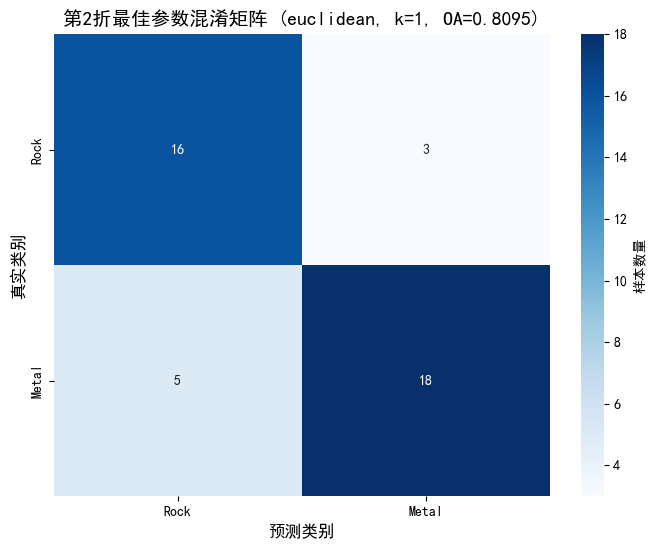

第2折最佳参数: euclidean 距离, k=1, OA=0.8095
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：7
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：7
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：7
已完成：42/42(100.0%)

正在处理第3折...
第3折训练集大小：166，测试集大小：42
KNN分类器训练完成
训练样本数：166
特征维度：(1

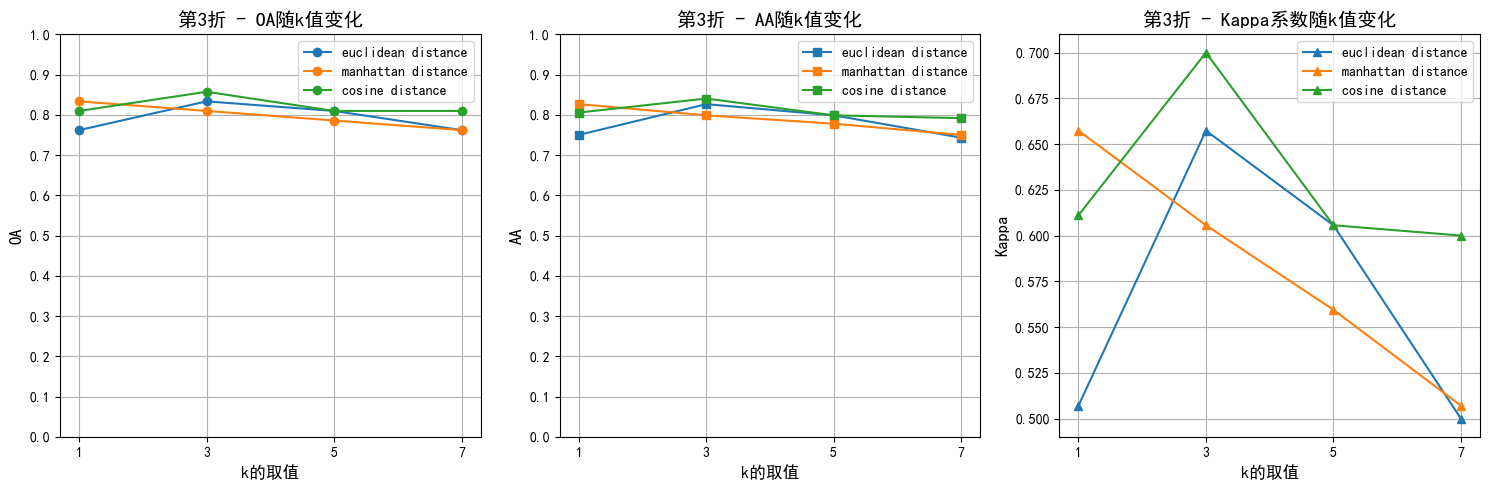

KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：3
已完成：42/42(100.0%)


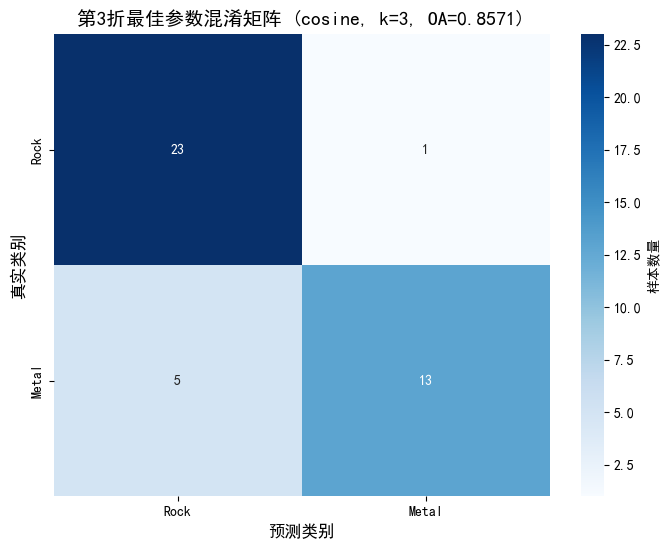

第3折最佳参数: cosine 距离, k=3, OA=0.8571
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：euclidean
K值：7
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：manhattan
K值：7
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：1
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：3
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：5
已完成：42/42(100.0%)
KNN分类器训练完成
训练样本数：166
特征维度：(166, 60)
使用距离度量：cosine
K值：7
已完成：42/42(100.0%)

正在处理第4折...
第4折训练集大小：167，测试集大小：41
KNN分类器训练完成
训练样本数：167
特征维度：(167,

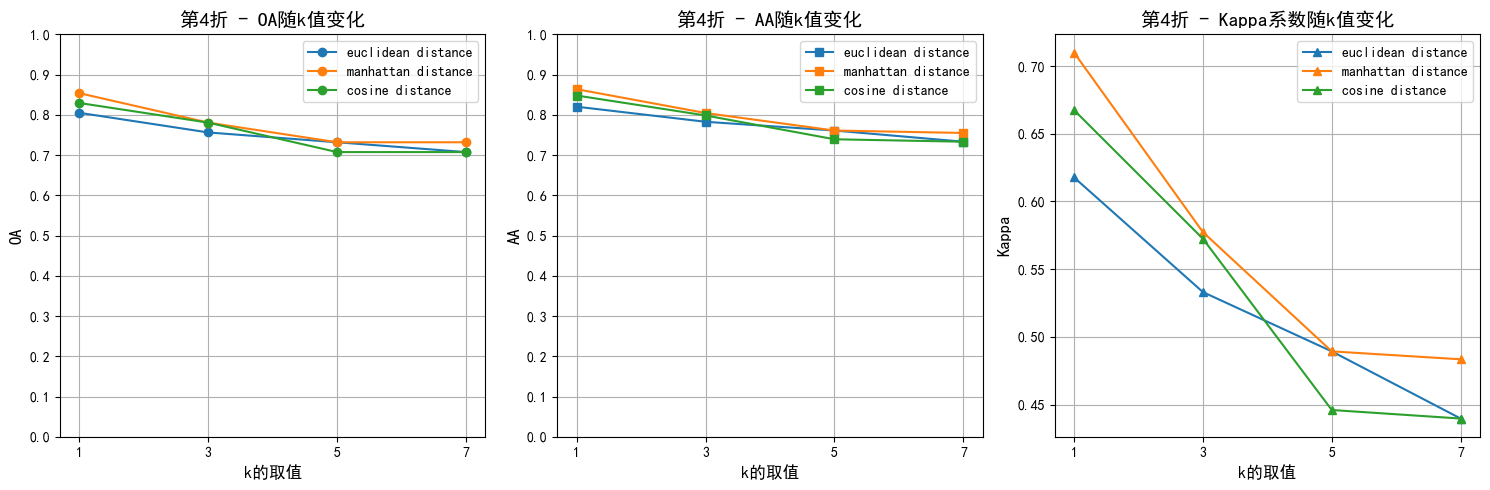

KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：euclidean
K值：1
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：manhattan
K值：1
已完成：41/41(100.0%)


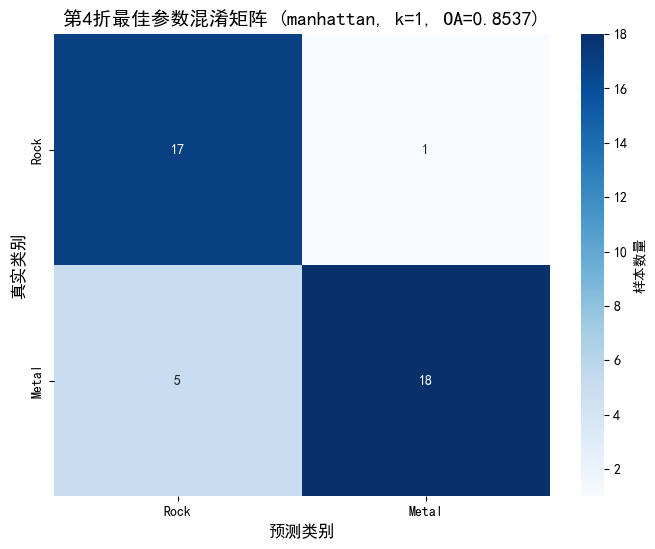

第4折最佳参数: manhattan 距离, k=1, OA=0.8537
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：euclidean
K值：1
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：euclidean
K值：3
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：euclidean
K值：5
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：euclidean
K值：7
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：manhattan
K值：1
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：manhattan
K值：3
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：manhattan
K值：5
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：manhattan
K值：7
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：cosine
K值：1
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：cosine
K值：3
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：cosine
K值：5
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：cosine
K值：7
已完成：41/41(100.0%)

正在处理第5折...
第5折训练集大小：167，测试集大小：41
KNN分类器训练完成
训练样本数：167
特征维度：(1

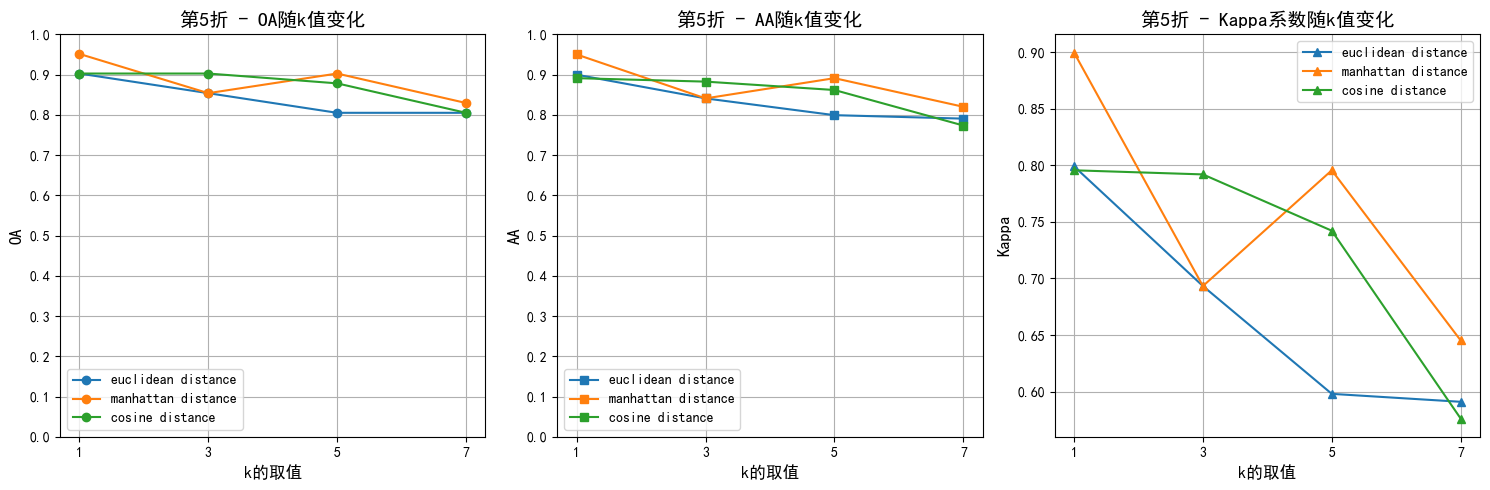

KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：euclidean
K值：1
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：manhattan
K值：1
已完成：41/41(100.0%)


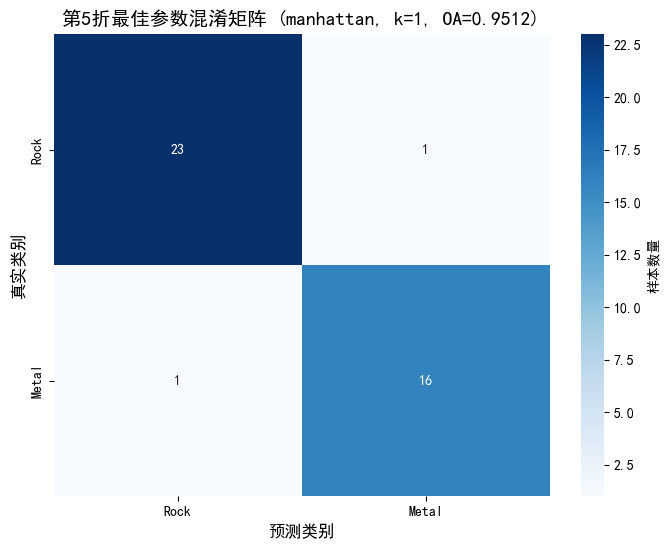

第5折最佳参数: manhattan 距离, k=1, OA=0.9512
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：euclidean
K值：1
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：euclidean
K值：3
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：euclidean
K值：5
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：euclidean
K值：7
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：manhattan
K值：1
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：manhattan
K值：3
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：manhattan
K值：5
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：manhattan
K值：7
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：cosine
K值：1
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：cosine
K值：3
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：cosine
K值：5
已完成：41/41(100.0%)
KNN分类器训练完成
训练样本数：167
特征维度：(167, 60)
使用距离度量：cosine
K值：7
已完成：41/41(100.0%)

K折交叉验证完成！
各种距离度量和k值的平均指标：

euclidean:
  k=1: OA=0.8319, AA=0.

In [30]:
def plot_knn_accuracy_for_fold(X_train_fold, y_train_fold, X_test_fold, y_test_fold, k_values, distance_metrics, fold_num, class_names=None):

    
    # 存储各指标数据
    oa_data = {}
    aa_data = {}
    kappa_data = {}
    
    # 创建子图
    plt.figure(figsize=(15, 5))
    
    # 对每种距离度量计算指标
    for distance_metric in distance_metrics:
        oa_values = []
        aa_values = []
        kappa_values = []
        
        for k in k_values:
            # 初始化 KNN 分类器
            knn = KNNClassifier(k=k, distance_metric=distance_metric)
            
            # 训练模型
            knn.fit(X_train_fold, y_train_fold)
            
            # 预测
            y_pred = knn.predict(X_test_fold)
            
            # 计算混淆矩阵
            cm = confusion_matrix(y_test_fold, y_pred)
            
            # 计算OA (Overall Accuracy)
            oa = np.sum(y_test_fold == y_pred) / len(y_test_fold)
            oa_values.append(oa)
            
            # 计算AA (Average Accuracy)
            n_classes = len(np.unique(y_test_fold))
            class_accuracies = []
            for i in range(n_classes):
                class_correct = cm[i, i]
                class_total = np.sum(cm[i, :])
                if class_total > 0:
                    class_acc = class_correct / class_total
                else:
                    class_acc = 0
                class_accuracies.append(class_acc)
            aa = np.mean(class_accuracies)
            aa_values.append(aa)
            
            # 计算Kappa系数
            total_samples = np.sum(cm)
            po = oa
            pe = 0
            for i in range(n_classes):
                row_sum = np.sum(cm[i, :])
                col_sum = np.sum(cm[:, i])
                pe += (row_sum * col_sum) / (total_samples * total_samples)
            
            if pe == 1:
                kappa = 0
            else:
                kappa = (po - pe) / (1 - pe)
            kappa_values.append(kappa)
        
        # 存储数据
        oa_data[distance_metric] = oa_values
        aa_data[distance_metric] = aa_values
        kappa_data[distance_metric] = kappa_values
    
    # 绘制OA图
    plt.subplot(1, 3, 1)
    for distance_metric in distance_metrics:
        plt.plot(k_values, oa_data[distance_metric], marker='o', label=f'{distance_metric} distance')
    plt.title(f'第{fold_num}折 - OA随k值变化', fontsize=14)
    plt.xlabel('k的取值', fontsize=12)
    plt.ylabel('OA', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(k_values)
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # 绘制AA图
    plt.subplot(1, 3, 2)
    for distance_metric in distance_metrics:
        plt.plot(k_values, aa_data[distance_metric], marker='s', label=f'{distance_metric} distance')
    plt.title(f'第{fold_num}折 - AA随k值变化', fontsize=14)
    plt.xlabel('k的取值', fontsize=12)
    plt.ylabel('AA', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(k_values)
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # 绘制Kappa图
    plt.subplot(1, 3, 3)
    for distance_metric in distance_metrics:
        plt.plot(k_values, kappa_data[distance_metric], marker='^', label=f'{distance_metric} distance')
    plt.title(f'第{fold_num}折 - Kappa系数随k值变化', fontsize=14)
    plt.xlabel('k的取值', fontsize=12)
    plt.ylabel('Kappa', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(k_values)
    
    plt.tight_layout()
    plt.show()
    
    # 找出当前折最佳OA对应的参数并显示其混淆矩阵
    best_oa = 0
    best_params = None
    best_cm = None
    
    for distance_metric in distance_metrics:
        for i, k in enumerate(k_values):
            if oa_data[distance_metric][i] > best_oa:
                best_oa = oa_data[distance_metric][i]
                best_params = (distance_metric, k)
                
                # 重新计算最佳参数的混淆矩阵
                knn = KNNClassifier(k=k, distance_metric=distance_metric)
                knn.fit(X_train_fold, y_train_fold)
                y_pred = knn.predict(X_test_fold)
                best_cm = confusion_matrix(y_test_fold, y_pred)
    
    # 绘制当前折最佳参数的混淆矩阵
    plt.figure(figsize=(8, 6))
    if class_names is None:
        class_names = [f'Class {i}' for i in range(len(best_cm))]
    
    sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': '样本数量'})
    plt.title(f'第{fold_num}折最佳参数混淆矩阵 ({best_params[0]}, k={best_params[1]}, OA={best_oa:.4f})', fontsize=14)
    plt.xlabel('预测类别', fontsize=12)
    plt.ylabel('真实类别', fontsize=12)
    plt.show()
    
    print(f"第{fold_num}折最佳参数: {best_params[0]} 距离, k={best_params[1]}, OA={best_oa:.4f}")

# 修改后的K折交叉验证函数，为每折都绘制图像
def perform_kfold_cross_validation_with_plots(X, y, k_values, distance_metrics=['euclidean', 'manhattan', 'cosine'], k_folds=5, class_names=None):
    """执行K折交叉验证并为每一折绘制图像"""
    from sklearn.metrics import confusion_matrix
    
    kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    fold_accuracies = {metric: {k: [] for k in k_values} for metric in distance_metrics}
    fold_aa_values = {metric: {k: [] for k in k_values} for metric in distance_metrics}
    fold_kappa_values = {metric: {k: [] for k in k_values} for metric in distance_metrics}
    
    print(f"开始执行{k_folds}折交叉验证，每折都会绘制相应图像")
    print("="*50)
    
    # 为每一折进行处理
    for fold_num, (train_idx, test_idx) in enumerate(kfold.split(X, y), 1):
        print(f"\n正在处理第{fold_num}折...")
        
        # 划分当前折的训练集和测试集
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]
        
        print(f"第{fold_num}折训练集大小：{len(X_train_fold)}，测试集大小：{len(X_test_fold)}")
        
        # 为当前折绘制图像
        plot_knn_accuracy_for_fold(X_train_fold, y_train_fold, X_test_fold, y_test_fold, 
                                 k_values, distance_metrics, fold_num, class_names)
        
        # 收集每种距离度量和k值的准确率数据
        for distance_metric in distance_metrics:
            for k in k_values:
                # 创建并训练 KNN 分类器
                knn = KNNClassifier(k=k, distance_metric=distance_metric)
                knn.fit(X_train_fold, y_train_fold)
                
                # 预测并计算准确率
                y_pred_fold = knn.predict(X_test_fold)
                
                # 计算OA
                oa_fold = np.mean(y_pred_fold == y_test_fold)
                fold_accuracies[distance_metric][k].append(oa_fold)
                
                # 计算AA
                cm = confusion_matrix(y_test_fold, y_pred_fold)
                n_classes = len(np.unique(y_test_fold))
                class_accuracies = []
                for i in range(n_classes):
                    class_correct = cm[i, i]
                    class_total = np.sum(cm[i, :])
                    if class_total > 0:
                        class_acc = class_correct / class_total
                    else:
                        class_acc = 0
                    class_accuracies.append(class_acc)
                aa_fold = np.mean(class_accuracies)
                fold_aa_values[distance_metric][k].append(aa_fold)
                
                # 计算Kappa
                total_samples = np.sum(cm)
                po = oa_fold
                pe = 0
                for i in range(n_classes):
                    row_sum = np.sum(cm[i, :])
                    col_sum = np.sum(cm[:, i])
                    pe += (row_sum * col_sum) / (total_samples * total_samples)
                
                if pe == 1:
                    kappa_fold = 0
                else:
                    kappa_fold = (po - pe) / (1 - pe)
                fold_kappa_values[distance_metric][k].append(kappa_fold)
    
    # 计算每种距离度量和k值的平均准确率
    mean_fold_accuracies = {metric: {k: np.mean(fold_accuracies[metric][k]) for k in k_values} 
                           for metric in distance_metrics}
    mean_fold_aa = {metric: {k: np.mean(fold_aa_values[metric][k]) for k in k_values} 
                    for metric in distance_metrics}
    mean_fold_kappa = {metric: {k: np.mean(fold_kappa_values[metric][k]) for k in k_values} 
                       for metric in distance_metrics}
    
    print("\n" + "="*50)
    print("K折交叉验证完成！")
    print("各种距离度量和k值的平均指标：")
    for metric in distance_metrics:
        print(f"\n{metric}:")
        for k in k_values:
            oa_avg = mean_fold_accuracies[metric][k]
            aa_avg = mean_fold_aa[metric][k]
            kappa_avg = mean_fold_kappa[metric][k]
            print(f"  k={k}: OA={oa_avg:.4f}, AA={aa_avg:.4f}, Kappa={kappa_avg:.4f}")
    
    return fold_accuracies, mean_fold_accuracies, fold_aa_values, mean_fold_aa, fold_kappa_values, mean_fold_kappa

# 执行 K折交叉验证（每折都绘制图像）
distance_metrics=['euclidean', 'manhattan', 'cosine']
k_values = [1, 3, 5, 7]
# iris_class_names = ['Setosa', 'Versicolor', 'Virginica']

fold_accuracies, mean_fold_accuracies, fold_aa_values, mean_fold_aa, fold_kappa_values, mean_fold_kappa = perform_kfold_cross_validation_with_plots(
    X, y, k_values, distance_metrics, k_folds=5, class_names=['Rock','Metal']
)